# Parte 10

Sviluppo dei codici relativi alle formule di quadratura di Newton-Cotes nella versione composita e automatica.
Sperimentazione numerica relativa alle formule di quadratura implementate.

In [1]:
pkg load symbolic

## Formula dei trapezi composita

Definita su N sottointervalli individuati da nodi equispaziati.

In [2]:
function I = trapeziComp(f, a, b, N)

h = (b - a) / N; % passo di campionamento
x = (a:h:b); % nodi equispaziati

y = f(x); % vettore contenente le valutazioni della funzione

I = (y(1) + 2 * sum(y(2:N)) + y(N + 1)) * h / 2;
% formula dei trapezi di quadratura composita
% a = 1
% b = N + 2
% da 2 a N come da 1 a N - 1

end

## Formula di Simpson composita

Definita su N sottointervalli individuati da nodi equispaziati.

In [3]:
function I = simpComp(f, a, b, N)

h = (b - a) / (2 * N);
x = (a:h:b);
y = f(x);

I = (y(1) + 2 * sum(y(3:2:2 * N - 1)) + 4 * sum(y(2:2:2 * N)) ...
+ y(2 * N + 1)) * h/3;
% formula di Simpson composita
% a = 1
% b = 2*N + 1
% 2 -> N come 3 -> N - 1

end

## Formula di quadratura del trapezio con quadratura automatica

    [I, N] = trapToll(fun, a, b, tol)

Output:
- `I` indica la migliore approssimazione dell'integrale restituita dalla funzione;
- `N` indica il numero di sottointervalli in cui si applica la formula di quadratura del trapezio.

Fino a quando non si raggiunge la tolleranza desiderata o il numero massimo di sottointervalli creati si ricalcola l'approssimazione dell'integrale con un numero di sottointervalli progressivamente crescente.

In [4]:
function [I, N] = trapToll(fun, a, b, tol)

Nmax = 2048; % si impone comunque un limite superiore
err = 1;

N = 1;
I = trapeziComp(fun, a, b, N);

while N <= Nmax && err > tol
    N = 2 * N; % strategia di raddoppio del numero di sottointervalli
    Ik = trapeziComp(fun, a, b, N);
    err = abs(I - Ik) / 3; % formula stima del resto con s = 2
    I = Ik;
end

end

## Formula di quadratura di Simpson con quadratura automatica

    [I, N] = simpToll(fun, a, b, tol)

Output:
- `I` indica la migliore approssimazione dell'integrale restituita dalla funzione;
- `N` indica il numero di sottointervalli in cui si applica la formula di quadratura di Simpson.

Fino a quando non si raggiunge la tolleranza desiderata o il numero massimo di sottointervalli creati si ricalcola l'approssimazione dell'integrale con un numero di sottointervalli progressivamente crescente.

In [5]:
function [I, N] = simpToll(fun, a, b, tol)

Nmax = 2048;
err = 1;

N = 1;
I = simpComp(fun, a, b, N);

while N <= Nmax && err > tol
    N = 2 * N;
    Ik = simpComp(fun, a, b, N);
    err = abs(I - Ik) / 15;
    I = Ik;

end

end

## TODO - Esercizio 1

In [6]:
syms x %real
%----------------------
f = 1./(1 + x);
% f = x * sin(pi * x);
% f = x^2 * exp(x);
% f = log(1 + x);
%----------------------
f = function_handle(f);

a = 0; b = 1;
I_es = double(int(f,x,a,b)); % F = int(expr,var,a,b)
tol = 0.5e-3; % il resto deve avere modulo minore di tol

xx = linspace(a, b, 300);
% si calcola il massimo valor assunto dalla funzione in [a,b]

Symbolic pkg v2.9.0: Python communication link active, SymPy v1.5.


In [7]:
% Stima dell'errore commesso nell'integrazione tramite la formula dei trapezi

% 1.massimo in xx
df_trap = diff(f, x, 2);
df_trap = function_handle(df_trap);
yy_trap = feval(df_trap, xx);
max_trap = max(abs(yy_trap));

% 2. formula del resto dei trapezi per il numero di iterazioni
N_trap = (((b - a)^3 * max_trap) / (12 * tol))^(1/2);
N_trap = ceil(N_trap);

% 3. applicazione del metodo dei trapezi
I_trap = trapeziComp(f, a, b, N_trap);

% 4. calcolo errore relativo
err_rel = abs(I_es - I_trap) / abs(I_es);

In [8]:
% Stima dell'errore commesso nell'integrazione tramite la formula di Simpson

% 1. Massimo in xx

df_simp = diff(f, x, 4);
df_simp = matlabFunction(df_simp);
yy_simp = feval(df_simp, xx);
max_simp = max(abs(yy_simp));

% 2. Calcolo num. sottointervalli con formula del resto
N_simp = (((b - a)^5 * max_simp) / (2880 * tol))^(1/4);
N_simp = ceil(N_simp);

% 3. Calcolo integrale approssimato con formula di Simpson
I_simp = simpComp(f, a, b, N_simp);

% 4. Calcolo err_rel sull'approssimazione
err_rel_simp = abs(I_es - I_simp) / abs(I_es);

In [9]:
fprintf("trapezi composita: %e\n", err_rel);
fprintf("simpson composita: %e\n", err_rel_simp);

trapezi composita: 2.496877e-04
simpson composita: 3.262310e-05


## Esercizio 2

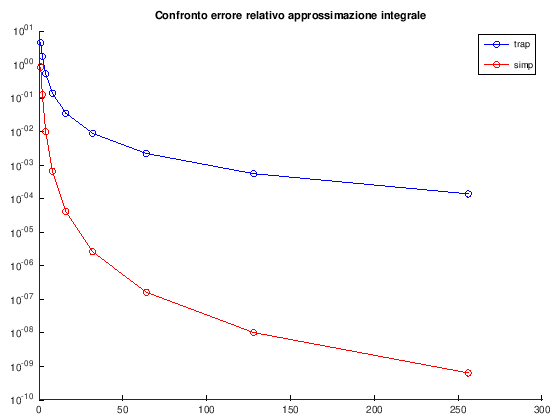

In [10]:
syms x %real

%---------------
f = x^10;
% f = log(x + 1);
% f = arcsin(x);
%---------------
f = function_handle(f);

a = 0; b = 1;
xx = linspace(a, b, 300);
I_es = double(int(f, x, a, b));
abs_es = abs(I_es);

% preallocazione
err_rel_trap = zeros(9, 1);
err_rel_simp = zeros(9, 1);

i = 0;
for N = [1 2 4 8 16 32 64 128 256] 
    i = i + 1;
    I_trap = trapeziComp(f, a, b, N);
    I_simp = simpComp(f, a, b, N);
    err_rel_trap(i) = abs(I_es - I_trap) / abs_es;
    err_rel_simp(i) = abs(I_es - I_simp) / abs_es;
end

figure
semilogy([1 2 4 8 16 32 64 128 256], err_rel_trap, "bo-", ...
    [1 2 4 8 16 32 64 128 256], err_rel_simp, "ro-");
title("Confronto errore relativo approssimazione integrale");
legend("trap","simp")
box off

## Esercizio 3

In [11]:
syms x real

%------------
f = log(x); a = 1; b = 2;
% f = sqrt(x); a = 0; b = 1;
% f = abs(x); a = -1; b = 1;
%------------

f = function_handle(f);
tol = 1.e-6;

[I_trap, N_trap] = trapToll(f, a, b, tol)
[I_simp, N_toll] = simpToll(f, a, b, tol)

I_trap =  0.38629
N_trap =  256
I_simp =  0.38629
N_toll =  8


## TODO - Esercizio 4

Si nota che più è piccolo l'esponente più la formula dei trapezi diventa meno efficiente in relazione a quella di Simpson.

In [17]:
syms x real

%------------
% f = cos(x); a = 0; b = 2;
% f = x * exp(x) * cos(x^2); a = -2; b = 0;
alpha = 13/2;
% alpha = 5/2;
% alpha = 1/2;
f = (sin(x))^alpha * cos(x); a = 0; b = pi/2;
%------------

f = function_handle(f);

I_es = int(f, x, a, b);
abs_es = abs(I_es);

for k = 4:10
    tol = 1 * 10^-k;   
    [I_trap, N_trap(k - 3)] = trapToll(f, a, b, tol);
    err_rel_trap(k - 3) = abs(I_es - I_trap) / abs_es;
    [I_simp, N_simp(k - 3)] = simpToll(f, a, b, tol);
    err_rel_simp(k - 3) = abs(I_es - I_simp) / abs_es;
end

N_val_trap = N_trap + 1;
N_val_simp = N_simp.*2 + 1;

    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mpower at line 76 column 5
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    power at line 84 column 5
    eval>@<anonymous> at line 1 column 20
    sym at line 312 column 7
    int at line 138 column 7
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    int at line 138 column 7
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    minus at line 55 column 5
error: operator =: no conversion for assignment of 'class' to indexed 'matrix'


error: __plt2vv__: vector lengths must match
error: called from
    __plt__>__plt2vv__ at line 482 column 5
    __plt__>__plt2__ at line 242 column 14
    __plt__ at line 107 column 18
    semilogy at line 60 column 10
    legend at line 426 column 9


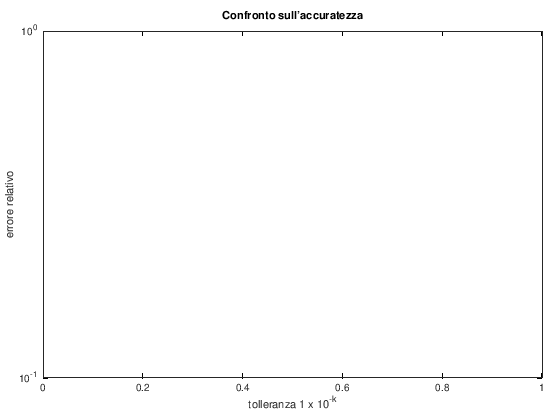

In [13]:
figure
semilogy((4:10), err_rel_trap, "bo-", ...
    (4:10), err_rel_simp, "ro-")
xlabel("tolleranza 1 x 10^{-k}")
ylabel("errore relativo");
legend("trapezi", "simpson");
title("Confronto sull'accuratezza")
box off

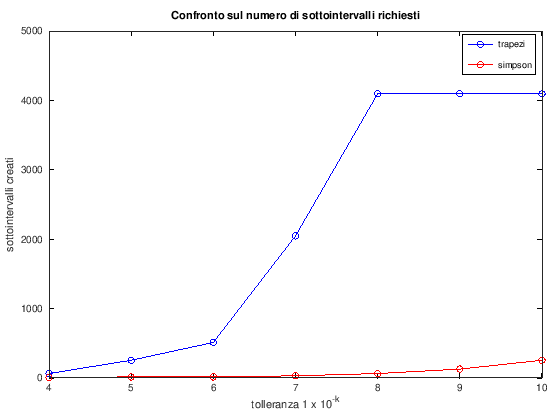

In [14]:
figure
plot((4:10), N_trap, "bo-", (4:10), N_simp, "ro-")
xlabel("tolleranza 1 x 10^{-k}")
ylabel("sottointervalli creati");
legend("trapezi", "simpson");
title("Confronto sul numero di sottointervalli richiesti")
box off

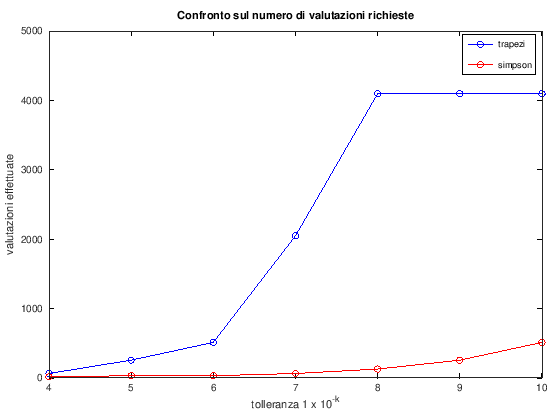

In [15]:
figure
plot((4:10), N_val_trap, "bo-", (4:10), N_val_simp, "ro-")
xlabel("tolleranza 1 x 10^{-k}")
ylabel("valutazioni effettuate");
legend("trapezi", "simpson");
title("Confronto sul numero di valutazioni richieste")
box off